In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
print("berhasil hooray!")

berhasil hooray!


In [109]:
boston = pd.read_csv('housing_boston.csv', sep='\\s+', engine='python')  # whitespace as separator
print("berhasil hooray!")

berhasil hooray!


## 1. Data Cleaning & Understanding

In [110]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [111]:
boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [112]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


note: tipe data sudah sesuai

## 2. EDA(Exploratory Data Analysis)

In [115]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# mengecek data yang bernilai null
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

note: tidak ada data yang bernilai null

In [114]:
# mengecek data yang duplikat
boston.duplicated().sum()

0

note: tidak ada data yang duplikat

<Axes: xlabel='MEDV', ylabel='Count'>

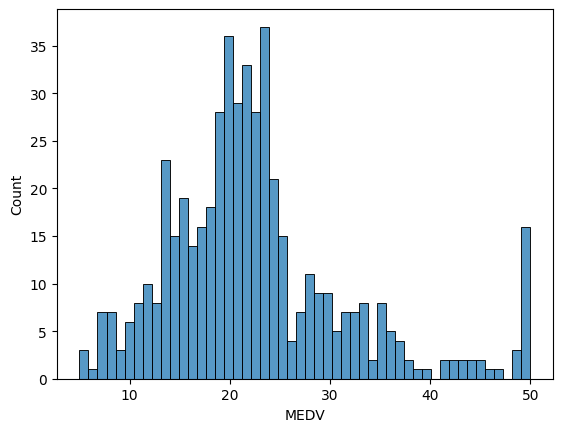

In [116]:
# menggambarkan distribusi persebaran nilai medv
sns.histplot(x="MEDV",data=boston,bins=50)

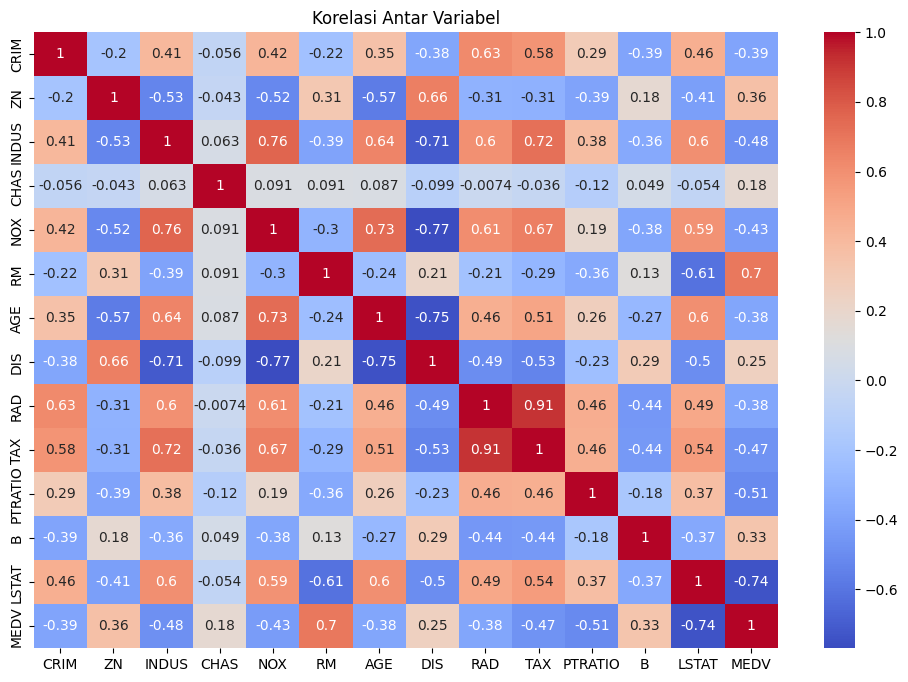

In [ ]:
# menggambarkan korelasi antar variabel
plt.figure(figsize=(12, 8))
sns.heatmap(boston.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Variabel")
plt.show()


## 3. Data Visualization

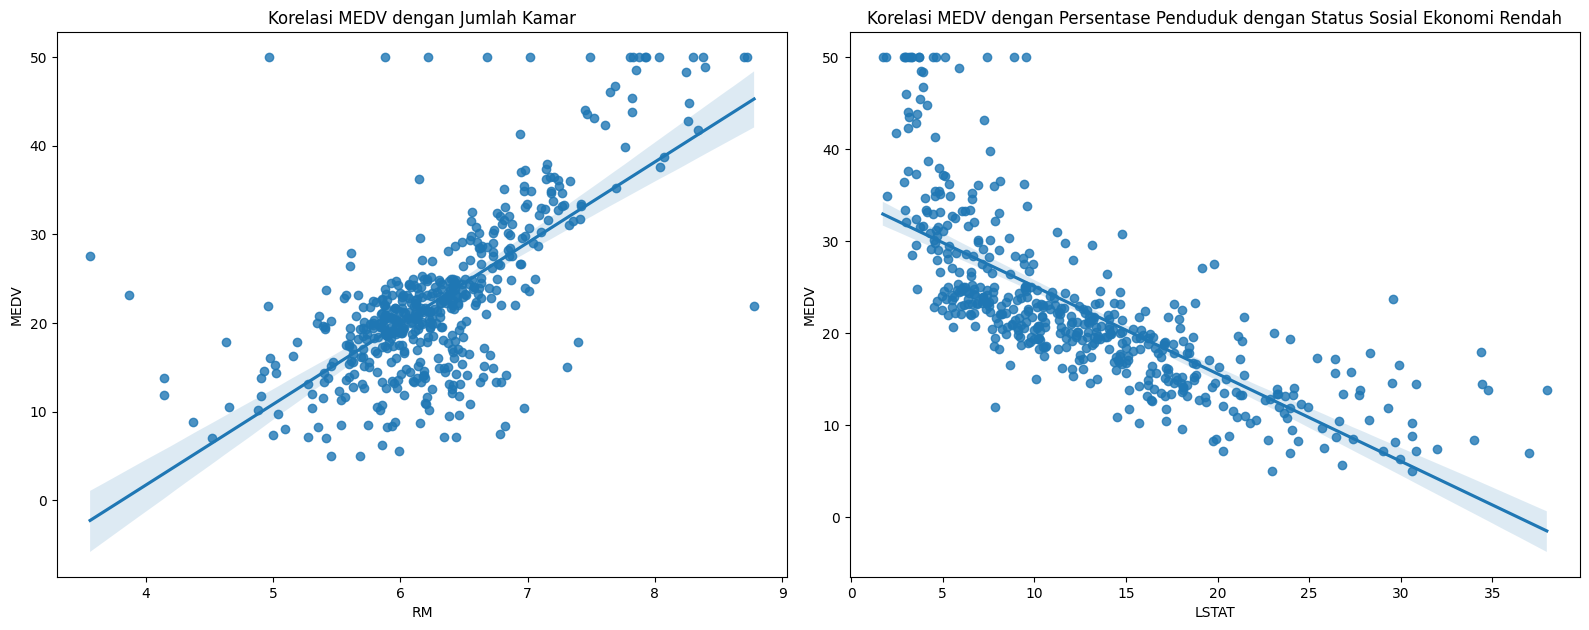

In [117]:
plt.figure(figsize=(16, 12))

# 1: korelasi medv dengan jumlah kamar
plt.subplot(2, 2, 1)
sns.regplot(x="RM", y="MEDV", data=boston, fit_reg=True)
plt.title("Korelasi MEDV dengan Jumlah Kamar")

# 2: korelasi medv dengan persentase penduduk dengan status sosial ekonomi rendah
plt.subplot(2, 2, 2)
sns.regplot(x="LSTAT", y="MEDV", data=boston, fit_reg=True)
plt.title("Korelasi MEDV dengan Persentase Penduduk dengan Status Sosial Ekonomi Rendah")

plt.tight_layout()
plt.show()

Hasilnya adalah:

1.korelasi MEDV dengan Jumlah Kamar (RM)
grafik menunjukkan korelasi positif yang cukup kuat antara jumlah kamar (RM) dan harga rumah (MEDV). semakin banyak jumlah kamar di suatu rumah, semakin tinggi harga median rumah tersebut.

2.korelasi MEDV dengan Persentase Penduduk dengan Status Sosial Ekonomi Rendah (LSTAT)
terdapat korelasi negatif yang signifikan antara LSTAT dan MEDV. semakin tinggi persentase penduduk berstatus sosial ekonomi rendah di suatu daerah, semakin rendah harga median rumah. ini menunjukkan bahwa wilayah dengan penduduk berpenghasilan rendah cenderung memiliki nilai properti yang lebih rendah.

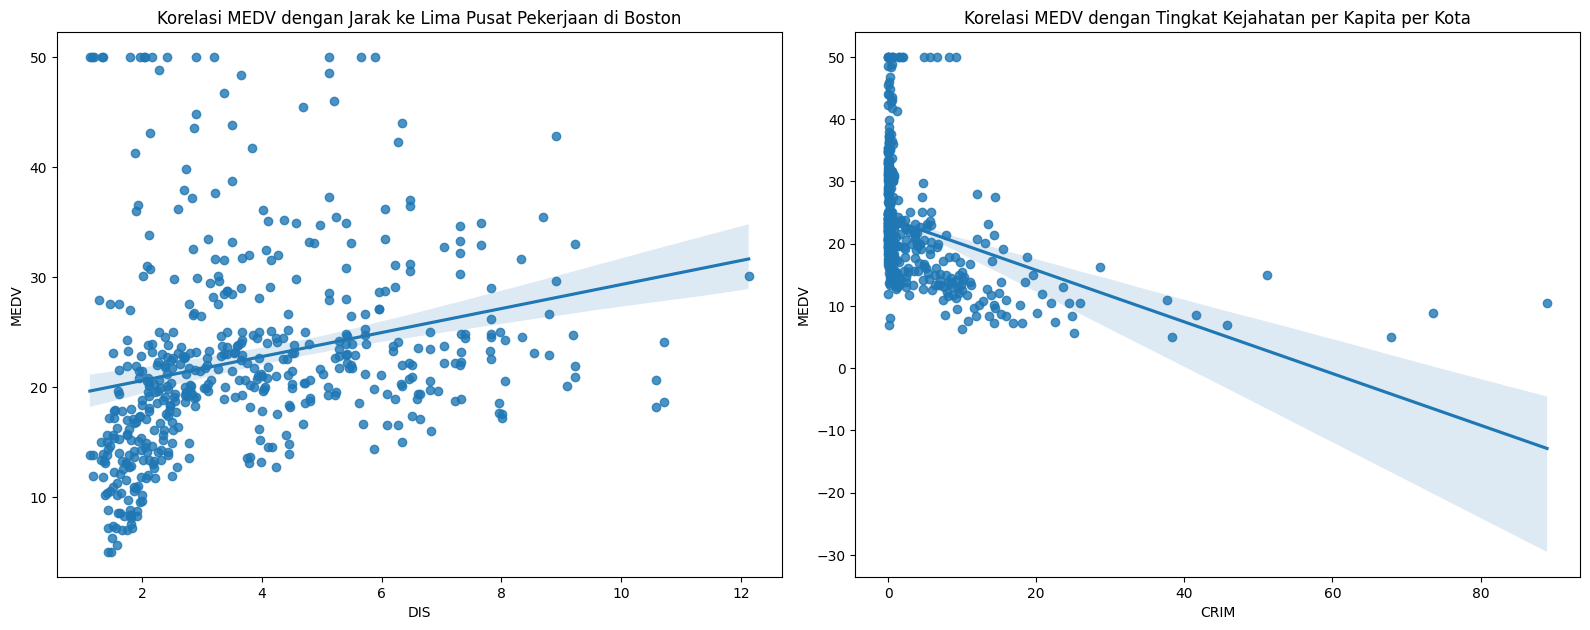

In [118]:
plt.figure(figsize=(16, 12))

# 3: korelasi MEDV dengan Jarak Terhitung ke Lima Pusat Pekerjaan di Boston
plt.subplot(2, 2, 1)
sns.regplot(x="DIS", y="MEDV", data=boston, fit_reg=True)
plt.title("Korelasi MEDV dengan Jarak ke Lima Pusat Pekerjaan di Boston")

# 4: korelasi MEDV dengan Tingkat Kejahatan per Kapita per Kota
plt.subplot(2, 2, 2)
sns.regplot(x="CRIM", y="MEDV", data=boston, fit_reg=True)
plt.title("Korelasi MEDV dengan Tingkat Kejahatan per Kapita per Kota")

# Mengatur layout agar tidak overlapping
plt.tight_layout()
plt.show()

Hasilnya adalah:

1.Korelasi MEDV dengan Jarak ke Lima Pusat Pekerjaan di Boston (DIS)
harga rumah cenderung sedikit meningkat seiring bertambahnya jarak ke pusat pekerjaan. jarak ke pusat pekerjaan (DIS) mungkin bukan faktor utama yang menentukan harga rumah, tetapi ada sedikit tren positif.

2.Korelasi MEDV dengan Tingkat Kejahatan per Kapita per Kota (CRIM)
semakin tinggi tingkat kejahatan (CRIM), semakin rendah harga rumah median. wilayah dengan tingkat kejahatan yang lebih tinggi cenderung memiliki harga properti yang lebih rendah.